In [22]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [20]:
#seeds:
np.random.seed(123)
tf.random.set_seed(123)

# Data Loading

In [54]:
artist_df = pd.read_csv('./Data/artists.csv', sep=",")
print("The number of painting is {}.".format(artist_df.shape[0]))

The number of painting is 50.


In [55]:
df

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


In [103]:
images_dir = './Data/resized'
artists_dirs = list(set([" ".join(filename.split("_")[:-1]) for filename in os.listdir(images_dir)])) #get all names from /resized
n_classes = len(artists_dirs)
print(artists_dirs)

['Andrei Rublev', 'Joan Miro', 'Rembrandt', 'Henri de Toulouse-Lautrec', 'Giotto di Bondone', 'Edvard Munch', 'Caravaggio', 'Raphael', 'Amedeo Modigliani', 'Salvador Dali', 'Hieronymus Bosch', 'Edouard Manet', 'Camille Pissarro', 'Kazimir Malevich', 'Jackson Pollock', 'Claude Monet', 'Marc Chagall', 'Diego Velazquez', 'Alfred Sisley', 'Titian', 'El Greco', 'Francisco Goya', 'Edgar Degas', 'Paul Gauguin', 'Henri Matisse', 'Paul Cezanne', 'Gustav Klimt', 'Pierre-Auguste Renoir', 'Albrecht Dürer', 'Peter Paul Rubens', 'Leonardo da Vinci', 'Sandro Botticelli', 'Albrecht Du╠êrer', 'Pieter Bruegel', 'Vasiliy Kandinskiy', 'Piet Mondrian', 'Vincent van Gogh', 'Paul Klee', 'Mikhail Vrubel', 'Diego Rivera', 'Georges Seurat', 'Andy Warhol', 'Eugene Delacroix', 'Henri Rousseau', 'Jan van Eyck', 'Gustave Courbet', 'Rene Magritte', 'Michelangelo', 'William Turner', 'Pablo Picasso', 'Frida Kahlo']


In [104]:
print(len(artists_dirs))

51


In [105]:
# Correct the data quality issue with Albrecht Dürer
artists_dirs.remove('Albrecht Du╠êrer')

In [106]:
print(len(artists_dirs))

50


# Data Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


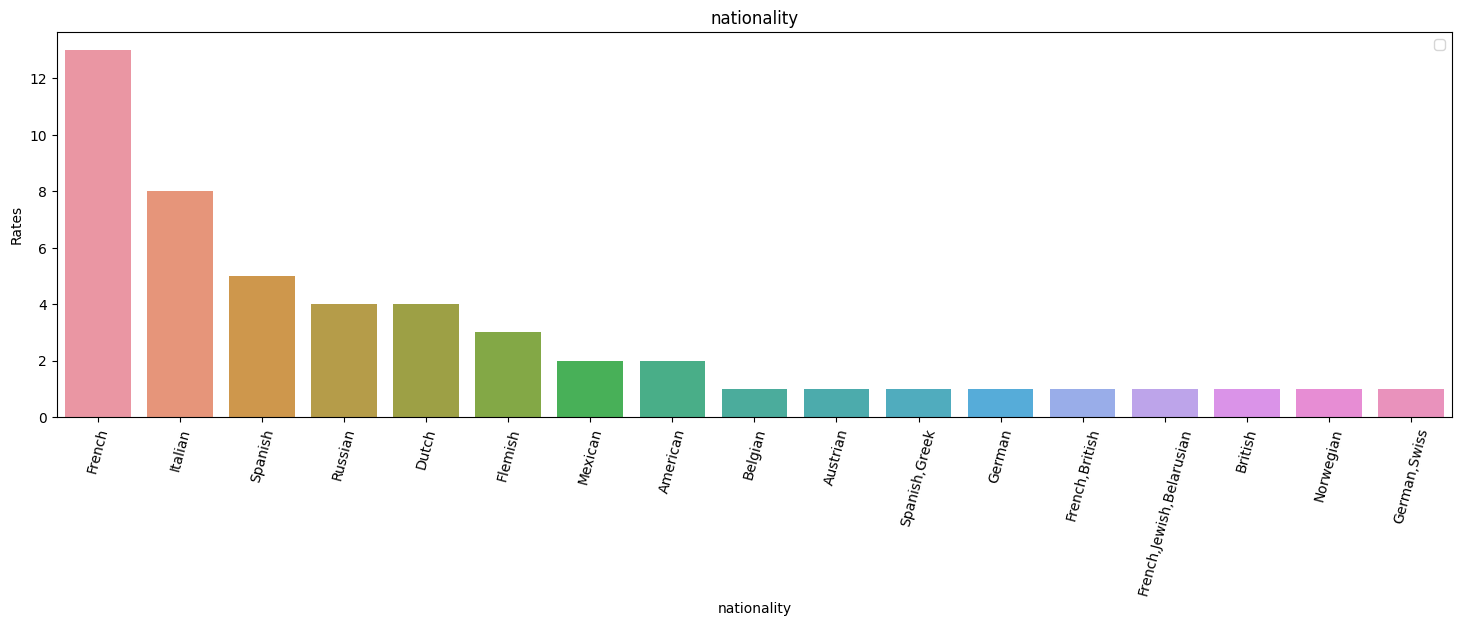

In [107]:
plt.figure(figsize=(18,5))

sns.barplot(x=artist_df['nationality'].value_counts().index,y=artist_df['nationality'].value_counts().values)
plt.title('nationality')
plt.xticks(rotation=75)
plt.ylabel('Rates')
plt.legend(loc=0)
plt.show()

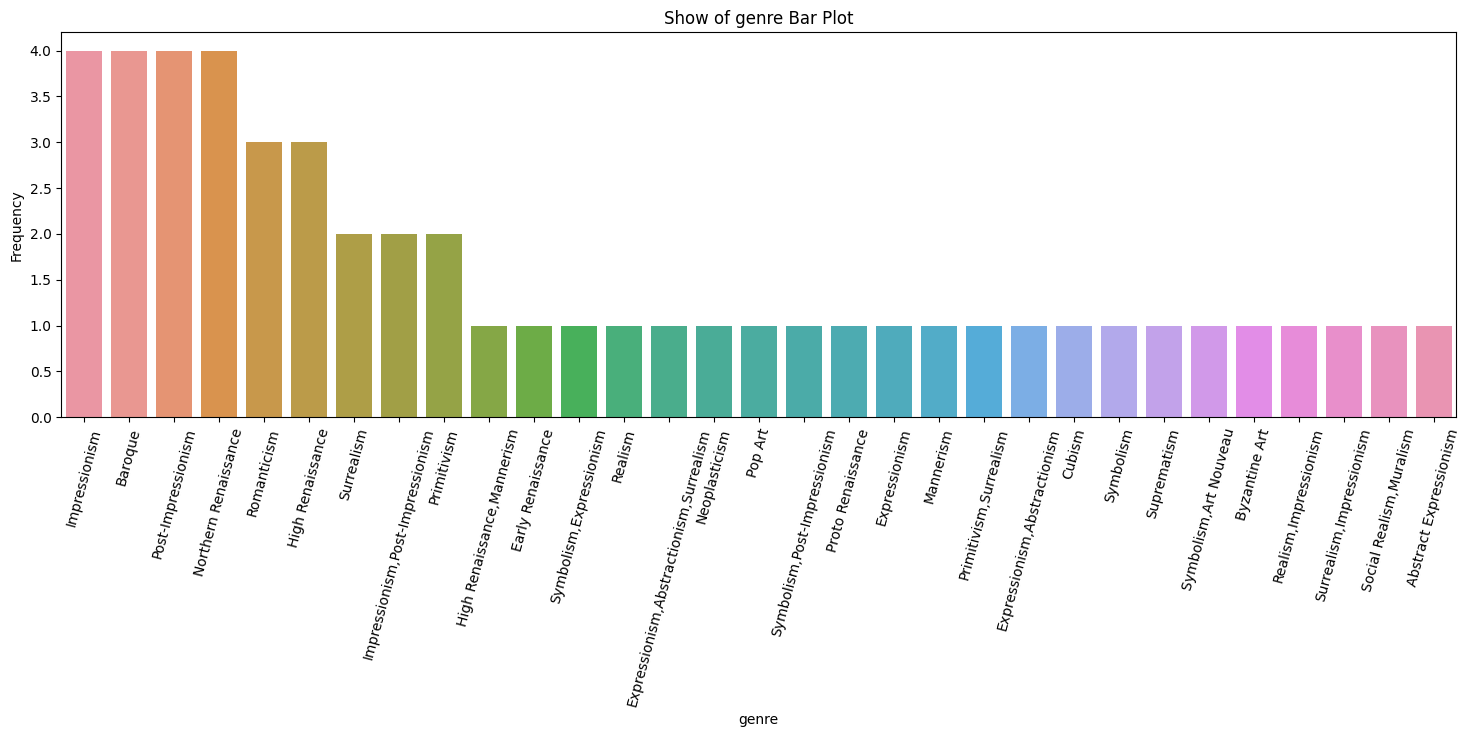

In [108]:
plt.figure(figsize=(18,5))
sns.barplot(x=artist_df['genre'].value_counts().index,
              y=artist_df['genre'].value_counts().values)
plt.xlabel('genre')
plt.xticks(rotation=75)
plt.ylabel('Frequency')
plt.title('Show of genre Bar Plot')
plt.show()

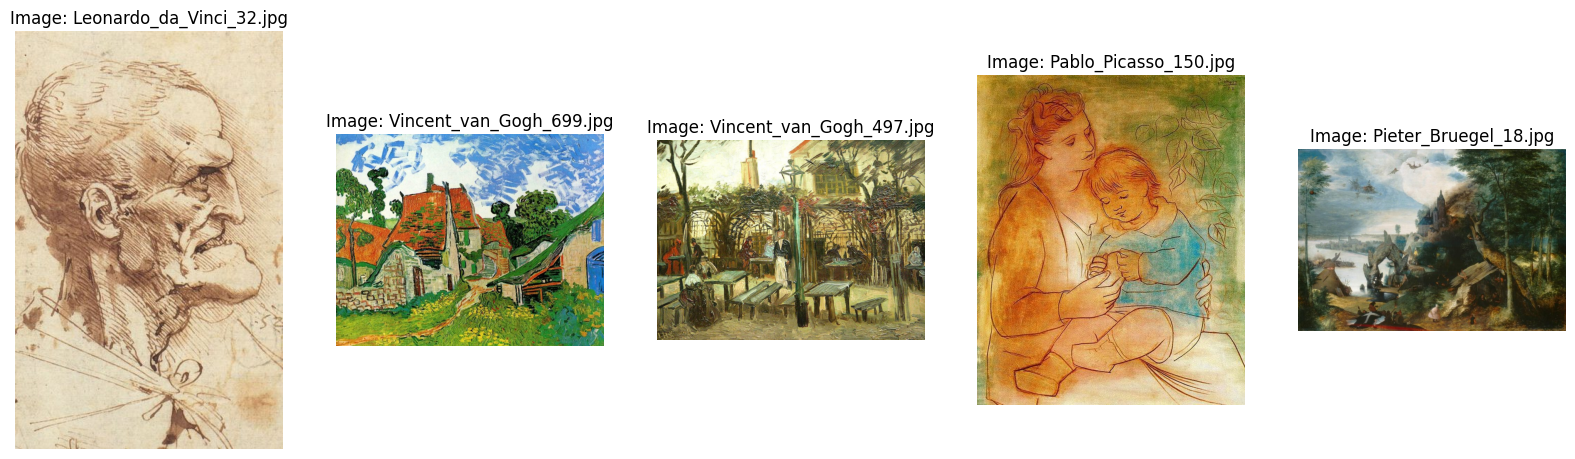

In [109]:
fig, axes = plt.subplots(1, 5, figsize=(20,10))

for i in range(5):
    random_image = random.choice(os.listdir(os.path.join(images_dir)))
    random_image_file = os.path.join(images_dir, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Image: " + random_image)
    axes[i].axis('off')

plt.show()

# Train and Test Split

In [111]:
# Create a DataFrame to store filename and artist mapping
file_artist_mapping = []

for filename in os.listdir(images_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        artist_name = " ".join(filename.split("_")[:-1])
        file_artist_mapping.append({'filename': filename, 'artist': artist_name})

df = pd.DataFrame(file_artist_mapping)

# Remove rows where the artist is 'Albrecht Du╠êrer'
df = df[df['artist'] != 'Albrecht Du╠êrer']

# Get unique artist names
artists = df['artist'].unique()
n_classes = len(artists)

# Define image size and other parameters
img_size = (128, 128)
batch_size = 32

# Create data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=images_dir,
    x_col='filename',
    y_col='artist',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=images_dir,
    x_col='filename',
    y_col='artist',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 6684 validated image filenames belonging to 50 classes.
Found 1671 validated image filenames belonging to 50 classes.


# Simple CNN Model

In [112]:
def simple_cnn():
    
    # Build a simple CNN model
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(n_classes, activation='softmax'))

    return model

In [113]:
#Initialize model
model= simple_cnn()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
209/209 [==============================] - 28s 128ms/step - loss: 3.6013 - accuracy: 0.1275 - val_loss: 3.3139 - val_accuracy: 0.1903
Epoch 2/10
209/209 [==============================] - 27s 128ms/step - loss: 3.2459 - accuracy: 0.1961 - val_loss: 3.0538 - val_accuracy: 0.2184
Epoch 3/10
209/209 [==============================] - 28s 131ms/step - loss: 3.1529 - accuracy: 0.2160 - val_loss: 2.9545 - val_accuracy: 0.2382
Epoch 4/10
209/209 [==============================] - 31s 148ms/step - loss: 3.1301 - accuracy: 0.2464 - val_loss: 2.8691 - val_accuracy: 0.2819
Epoch 5/10
209/209 [==============================] - 29s 139ms/step - loss: 3.0007 - accuracy: 0.2784 - val_loss: 2.9427 - val_accuracy: 0.2633
Epoch 6/10
209/209 [==============================] - 34s 160ms/step - loss: 3.0065 - accuracy: 0.2838 - val_loss: 2.9359 - val_accuracy: 0.3070
Epoch 7/10
209/209 [==============================] - 32s 151ms/step - loss: 2.9485 - accuracy: 0.3066 - val_loss: 2.9541 - val_ac

In [114]:
# Prediction accuracy on train data
score = model.evaluate_generator(train_generator, verbose=1)
print("Prediction accuracy on train data =", score[1])

209/209 [==============================] - 22s 105ms/step - loss: 2.7483 - accuracy: 0.4382
Prediction accuracy on train data = 0.438210666179657


In [115]:
# Prediction accuracy on CV data
score = model.evaluate_generator(validation_generator, verbose=1)
print("Prediction accuracy on CV data =", score[1])

53/53 [==============================] - 5s 96ms/step - loss: 4.8889 - accuracy: 0.2573
Prediction accuracy on CV data = 0.2573309540748596


# Data Augmentation

In [116]:
# Create a data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=images_dir,
    x_col='filename',
    y_col='artist',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=images_dir,
    x_col='filename',
    y_col='artist',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 6684 validated image filenames belonging to 50 classes.
Found 1671 validated image filenames belonging to 50 classes.


In [117]:
model= simple_cnn()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
209/209 [==============================] - 45s 210ms/step - loss: 3.5905 - accuracy: 0.1237 - val_loss: 3.3255 - val_accuracy: 0.1694
Epoch 2/10
209/209 [==============================] - 44s 209ms/step - loss: 3.2809 - accuracy: 0.1824 - val_loss: 3.1403 - val_accuracy: 0.1789
Epoch 3/10
209/209 [==============================] - 43s 204ms/step - loss: 3.1387 - accuracy: 0.2192 - val_loss: 3.0727 - val_accuracy: 0.2077
Epoch 4/10
209/209 [==============================] - 42s 201ms/step - loss: 3.0824 - accuracy: 0.2307 - val_loss: 2.9906 - val_accuracy: 0.2370
Epoch 5/10
209/209 [==============================] - 41s 197ms/step - loss: 2.9999 - accuracy: 0.2543 - val_loss: 2.8595 - val_accuracy: 0.2759
Epoch 6/10
209/209 [==============================] - 42s 199ms/step - loss: 2.9371 - accuracy: 0.2748 - val_loss: 2.7467 - val_accuracy: 0.2771
Epoch 7/10
209/209 [==============================] - 42s 200ms/step - loss: 2.9213 - accuracy: 0.2714 - val_loss: 2.7467 - val_ac

In [118]:
# Prediction accuracy on train data
score = model.evaluate_generator(train_generator, verbose=1)
print("Prediction accuracy on train data =", score[1])

209/209 [==============================] - 33s 157ms/step - loss: 2.5695 - accuracy: 0.3359
Prediction accuracy on train data = 0.3358767330646515


In [119]:
# Prediction accuracy on CV data
score = model.evaluate_generator(validation_generator, verbose=1)
print("Prediction accuracy on CV data =", score[1])

53/53 [==============================] - 8s 146ms/step - loss: 2.9299 - accuracy: 0.2890
Prediction accuracy on CV data = 0.2890484929084778
